# Lista 01 - Modelos Estatisticos

### Exericio 02 - Faça 3 modelos de regressão linear múltipla para predizer da melhor forma possível o preço dos automóveis.

1º Modelo com todas variáveis

2º Modelo com as 3 variáveis mais correlacionadas

3º Modelo com as 5 variáveis mais correlacionadas

Na análise de dados e do modelo devem contemplar:

1 – Análise descritiva

2 – Calculo de correlação e covariância

3 – Faça o modelo de regressão

4 – Realize a análise de resíduos

5 – Análise de multicolinearidade

6 – Análise de outlier

7 – Comparação de modelos

In [2]:
import pandas as pd
df_car_prices = pd.read_csv('./datasets/preco_carro.csv')

In [3]:
df_car_prices.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
df_car_prices.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [5]:
df_car_prices.dtypes

v.id               int64
on road old        int64
on road now        int64
years              int64
km                 int64
rating             int64
condition          int64
economy            int64
top speed          int64
hp                 int64
torque             int64
current price    float64
dtype: object

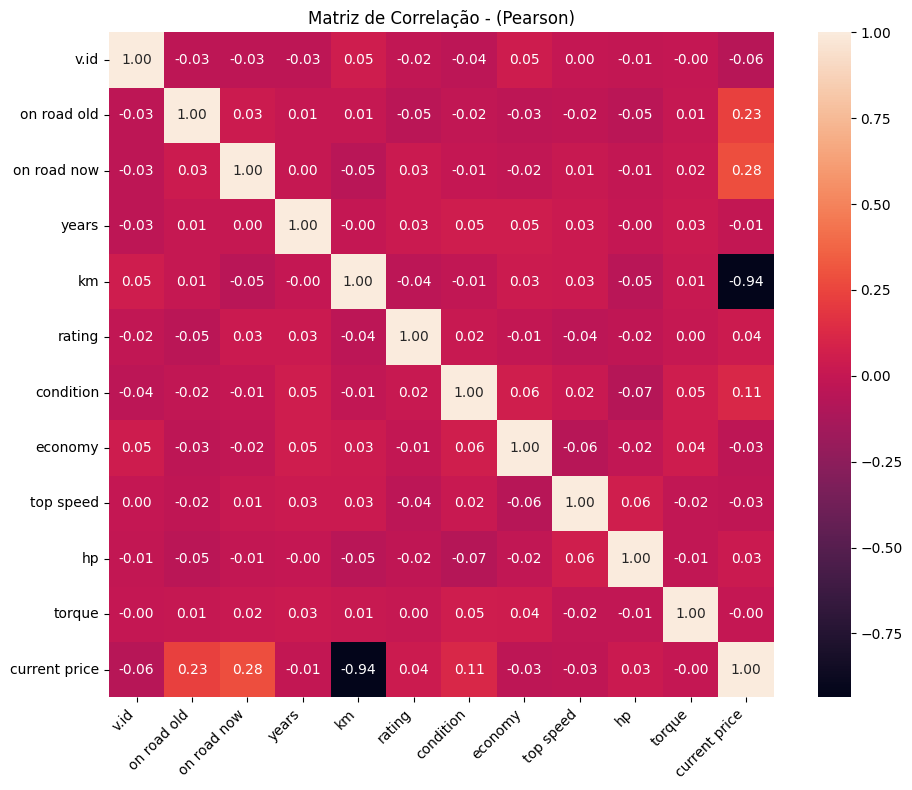

In [6]:
# Correlação: Calculo que mede a força e a direção do relacionamento linear entre duas variávies, variando entre -1 e 1.
import seaborn as sns
import matplotlib.pyplot as plt

price_correlation_matrix_pearson = df_car_prices.corr(method='pearson')

plt.figure(figsize=(10,8))

sns.heatmap(price_correlation_matrix_pearson, annot=True, fmt=".2f", cbar=True, square=True)
plt.title("Matriz de Correlação - (Pearson)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


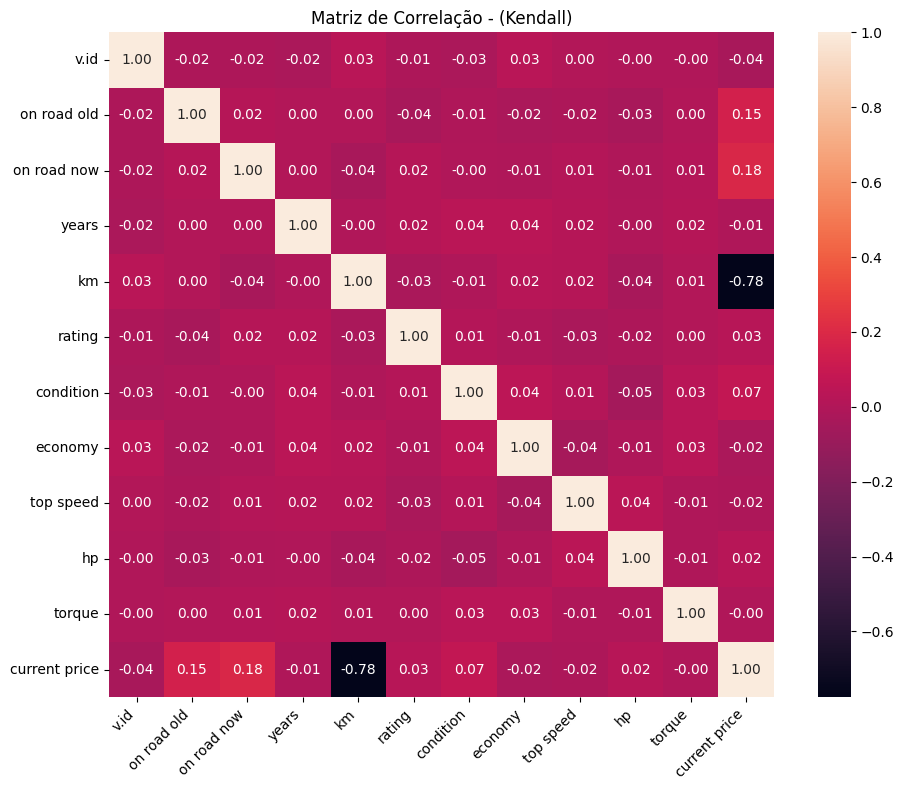

In [7]:
# Correlação: Calculo que mede a força e a direção do relacionamento linear entre duas variávies, variando entre -1 e 1.
import seaborn as sns
import matplotlib.pyplot as plt

price_correlation_matrix_pearson = df_car_prices.corr(method='kendall')

plt.figure(figsize=(10,8))

sns.heatmap(price_correlation_matrix_pearson, annot=True, fmt=".2f", cbar=True, square=True)
plt.title("Matriz de Correlação - (Kendall)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

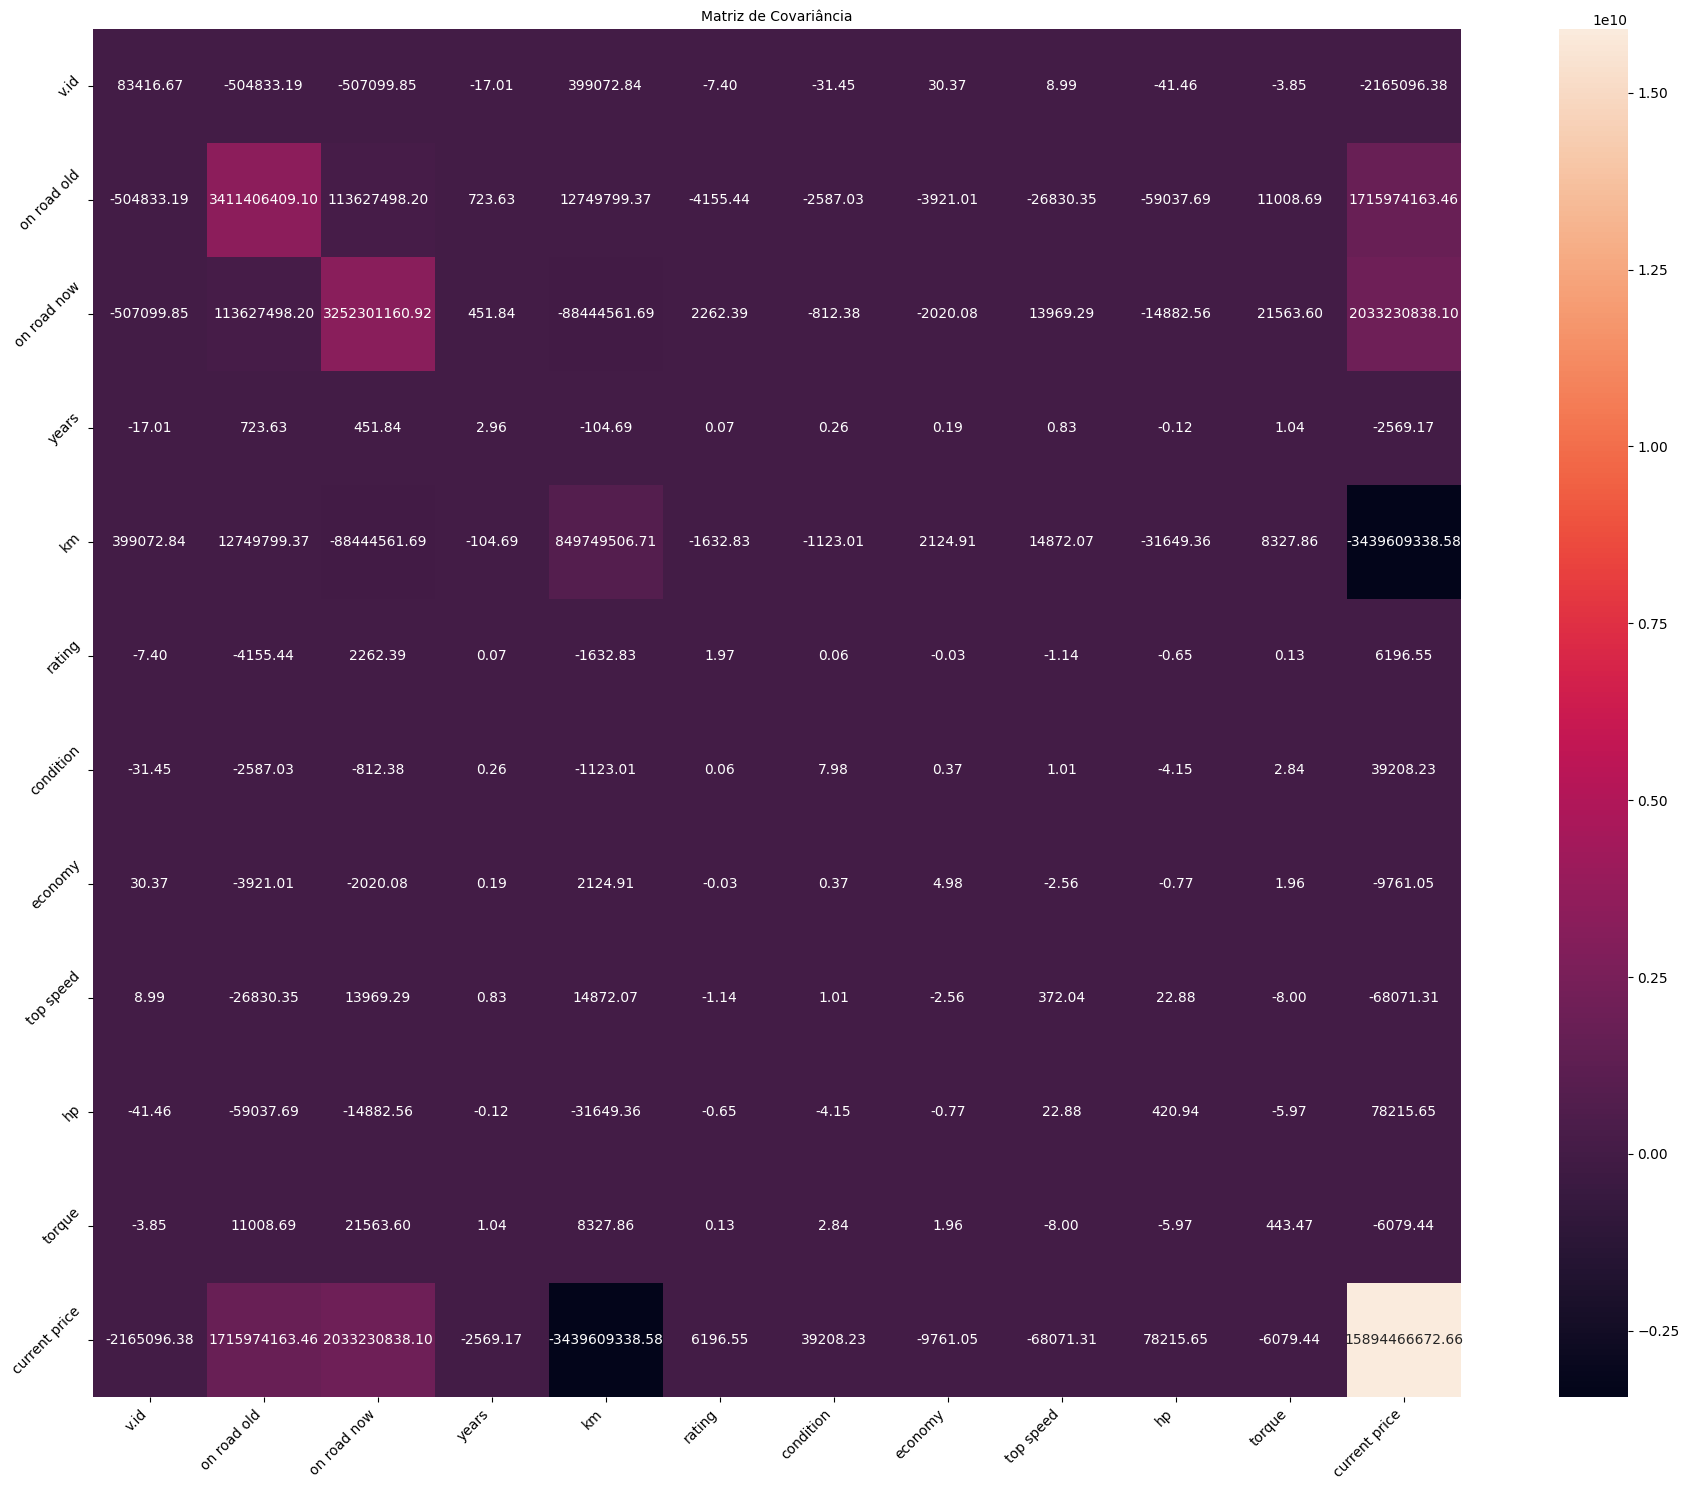

In [8]:
covariance = df_car_prices.cov()

plt.figure(figsize=(20,15))

sns.heatmap(covariance, annot=True, fmt=".2f", cbar=True, square=True)
plt.title("Matriz de Covariância", fontsize=10)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
# Modelo de Regressão - Com todas as variáveis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features_car_price = df_car_prices[['v.id', 'on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque']] # Features
target_car_price = df_car_prices['current price'] # Target

# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(features_car_price, target_car_price, test_size=0.3, random_state=42)


# Training model
model = LinearRegression()

model.fit(X_train, y_train)

# Predições
y_pred_car_prices = model.predict(X_test)


In [10]:
mse = mean_squared_error(y_test, y_pred_car_prices)
r2 = r2_score(y_test, y_pred_car_prices)

# O MSE mede a média dos quadrados dos erros, ou seja, a diferença entre os valores reais e as previsões feitas pelo modelo. Quanto menor o MSE, melhor o modelo
print(f' Avaliação de MSE: {mse}')

# O R² mede a proporção da variabilidade nos dados dependentes (Vendas) que é explicada pelas variáveis independentes (TV, Rádio, Jornal). 
# Ele varia de 0 a 1, onde 1 significa que o modelo explica 100% da variabilidade dos dados, e 0 significa que o modelo não explica nada da variabilidade.
print(f' Avaliação de R2 Explica : {r2} das variaveis independentes')

 Avaliação de MSE: 77841265.53590322
 Avaliação de R2 Explica : 0.9949803196346154 das variaveis independentes


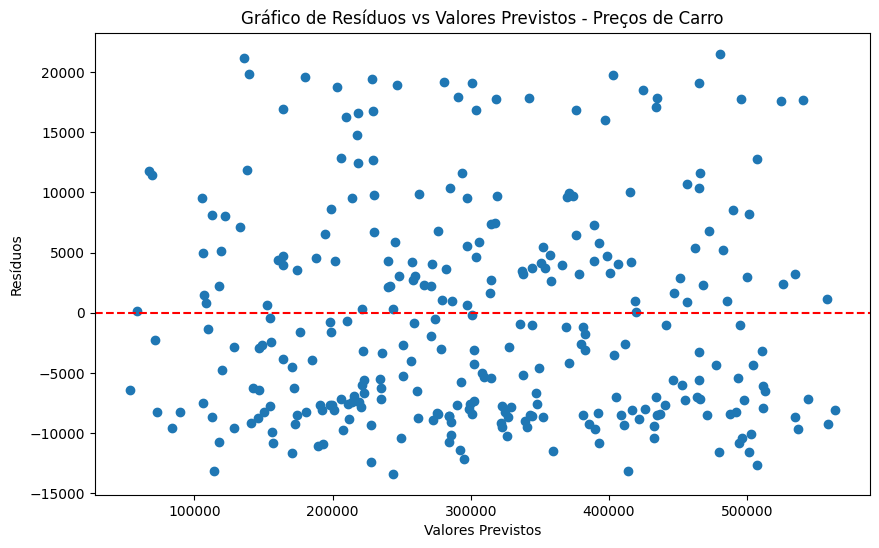

In [22]:
residuos = y_test - y_pred_car_prices

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_car_prices, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de Resíduos vs Valores Previstos - Preços de Carro")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.show()

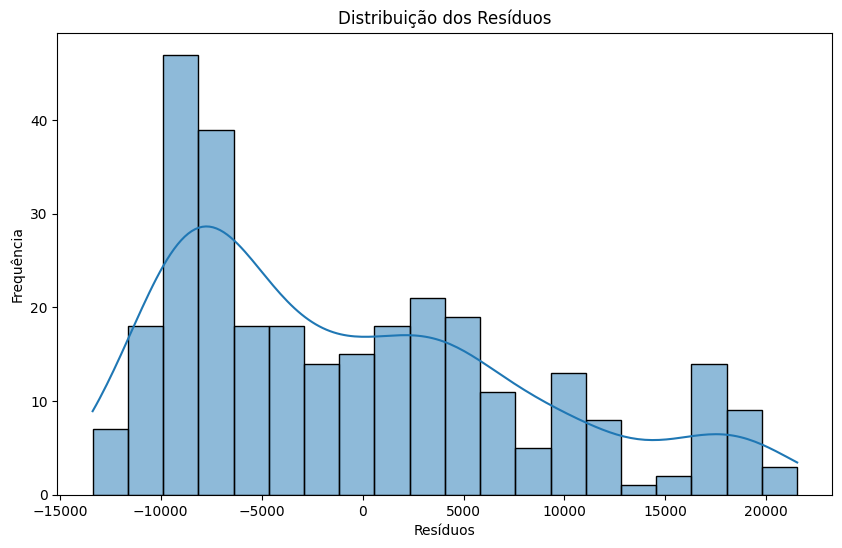

In [23]:

plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=20)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()

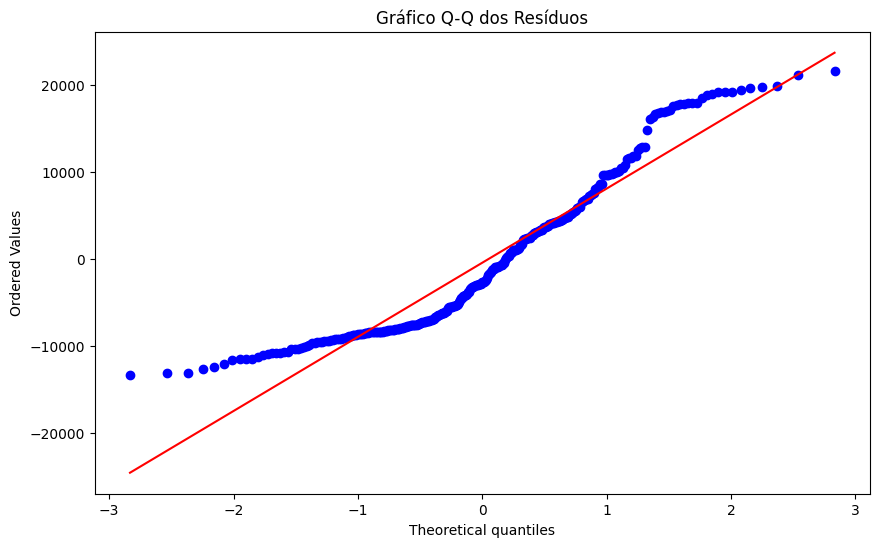

In [24]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q dos Resíduos")
plt.show()

In [14]:
# VIF (Variance Inflation Factor): O VIF mede o quanto a variabilidade de uma variável independente está sendo "inflacionada" devido à colinearidade com as outras variáveis independentes. 
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


features_to_vif = add_constant(features_car_price)

vif_df = pd.DataFrame()
vif_df["Variables"] = features_to_vif.columns
vif_df["VIF"] = [variance_inflation_factor(features_to_vif.values, i) for i in range(features_to_vif.shape[1])]

print(vif_df)

      Variables         VIF
0         const  484.248446
1          v.id    1.009148
2   on road old    1.009390
3   on road now    1.006572
4         years    1.008601
5            km    1.011719
6        rating    1.008845
7     condition    1.016272
8       economy    1.016010
9     top speed    1.012311
10           hp    1.015279
11       torque    1.005507


/var/folders/bw/1sh_h7vd347d33_w29khkbbm0000gn/T/ipykernel_14732/3018121575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variables', y='VIF', data=vif_df, palette='viridis', legend=False)


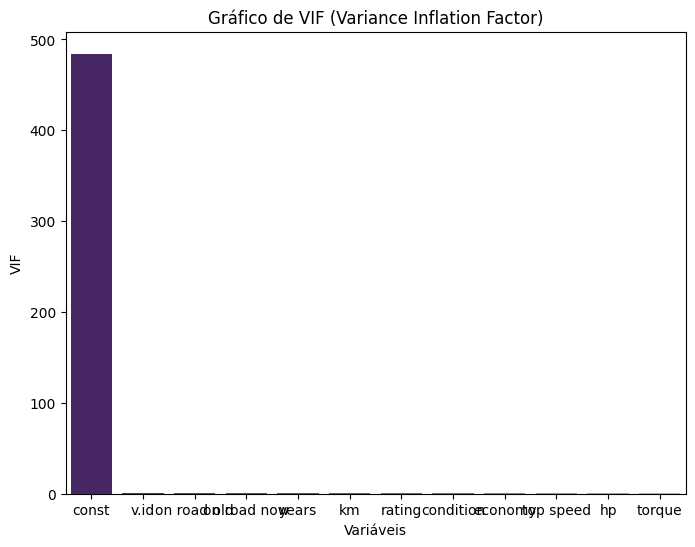

In [15]:

# Plotando o gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x='Variables', y='VIF', data=vif_df, palette='viridis', legend=False)
plt.title("Gráfico de VIF (Variance Inflation Factor)")
plt.ylabel("VIF")
plt.xlabel("Variáveis")
plt.show()

In [16]:
df_car_prices

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


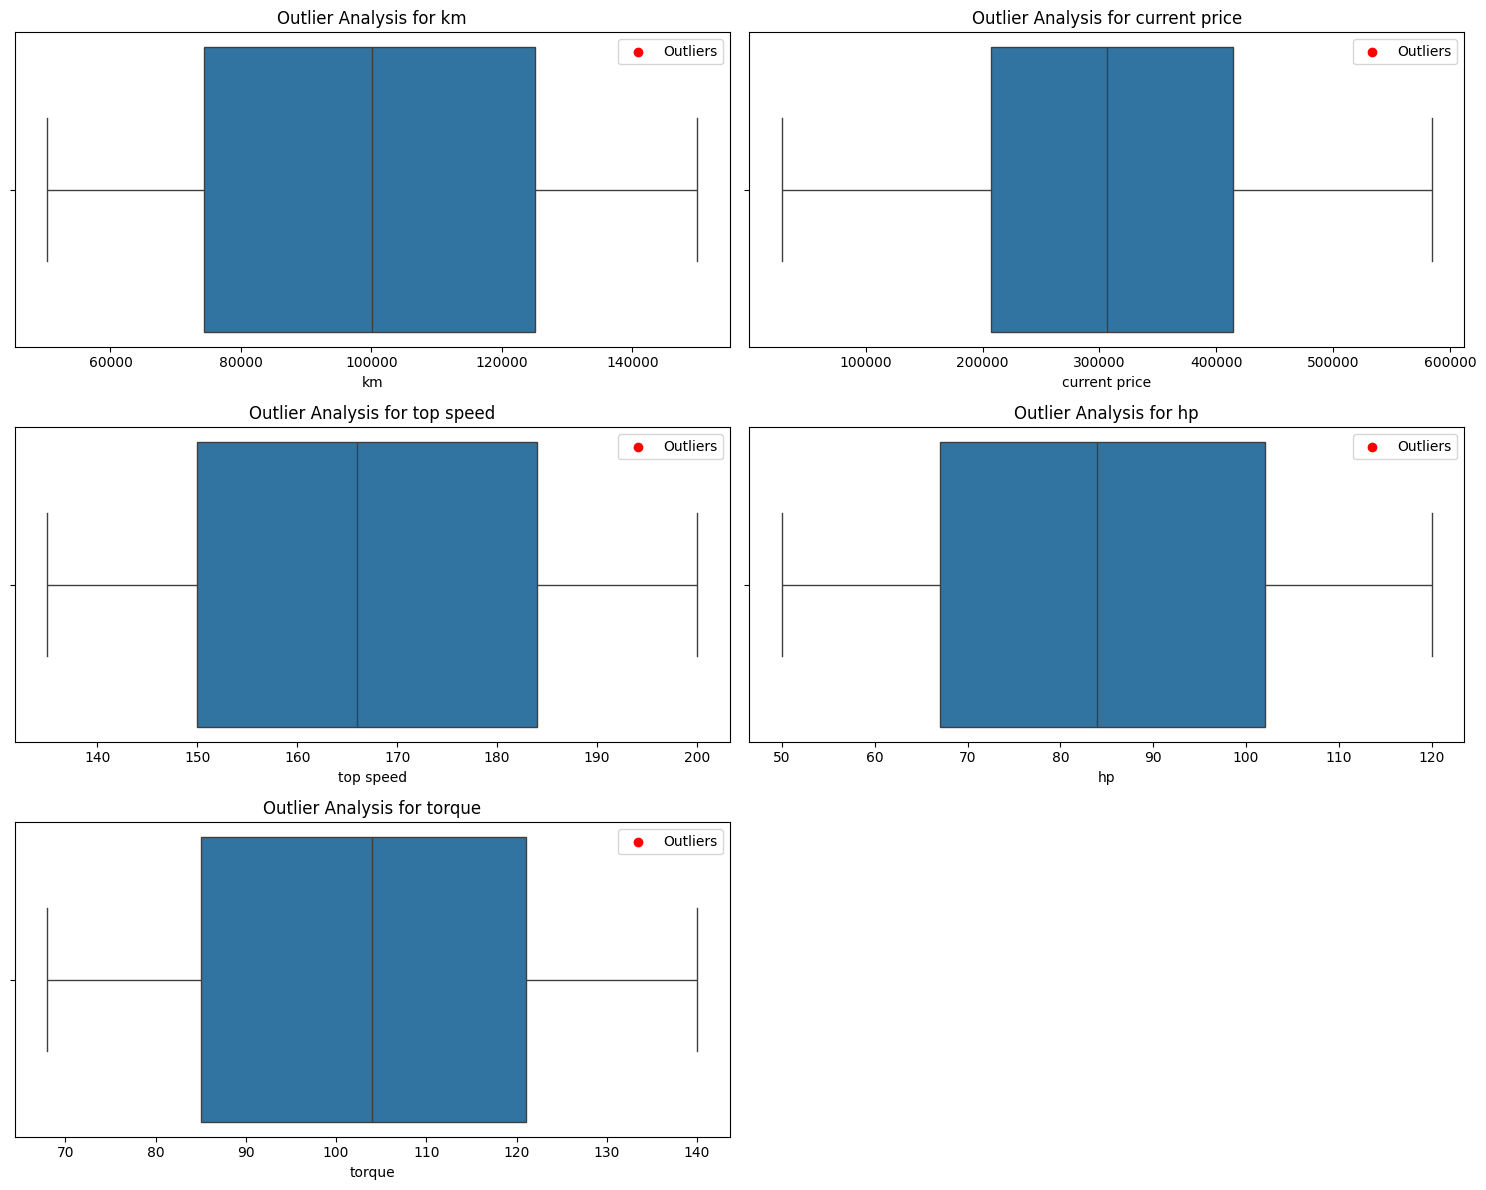

In [17]:
variables = ['km', 'current price', 'top speed', 'hp', 'torque']

def highlight_outliers(data, ax):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    sns.boxplot(x=data, ax=ax)
    ax.scatter(outliers, [1] * len(outliers), color='red', label='Outliers', zorder=5)
    ax.set_title(f'Outlier Analysis for {data.name}')
    ax.legend()

plt.figure(figsize=(15, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    highlight_outliers(df_car_prices[var], plt.gca())

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Real vs Predicted')

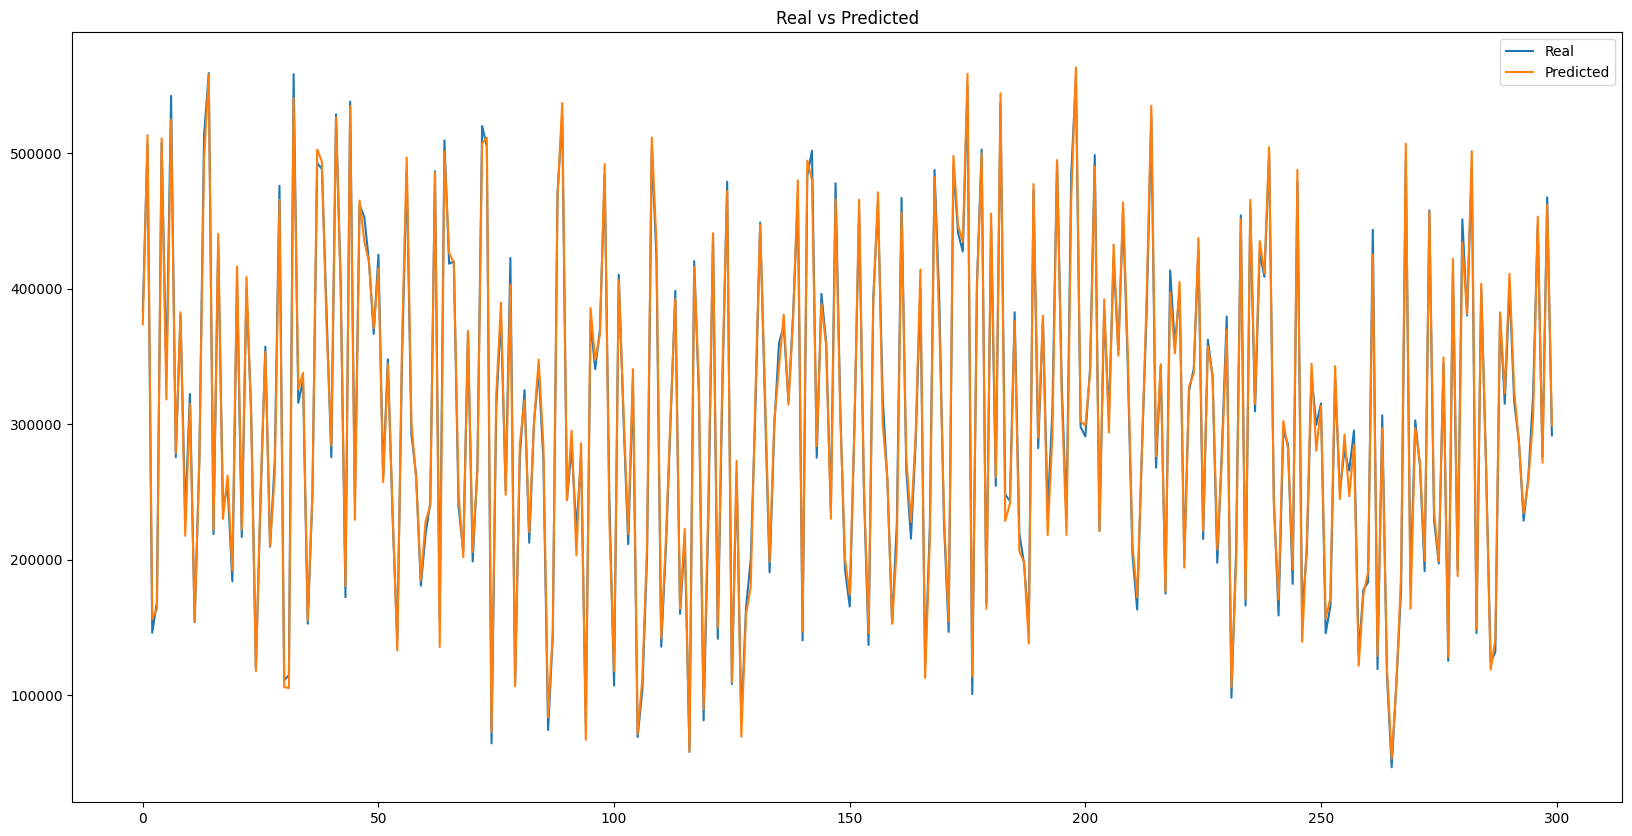

In [28]:
# Create a plot to compare the real values and the predicted values
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred_car_prices, label='Predicted')
plt.legend()
plt.title("Real vs Predicted")


In [26]:
new_df = pd.DataFrame({'Real': y_test.values, 'Predicted': y_pred_car_prices})

new_df

,Real,Predicted
0,383570.5,373868.367732
1,506854.0,513391.745301
2,146223.0,156142.336953
3,168854.5,164163.188247
4,507799.0,510953.617640
...,...,...
295,320391.5,303540.441634
296,447337.0,453302.322288
297,275781.0,271747.232367
298,467471.5,462069.227598
